In [145]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

In [147]:
X, y = make_moons(n_samples=1000)

In [150]:
# X, y = make_moons

In [151]:
# X, y = make_circles

In [152]:
ohe = OneHotEncoder(categories='auto')
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [153]:
print(y[:10])
print(y_hot[:10])

[0 1 0 1 0 0 0 0 0 1]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.33, random_state=42)

## Generating seq Model

In [162]:
model = Sequential()
model.add(Dense(8, activation="tanh", input_shape=[X.shape[1]]))
model.add(Dense(8, activation="tanh"))
model.add(Dense(y_hot.shape[1], activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 18        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.compile(optimizer="adam", loss=categorical_crossentropy, metrics=["accuracy"])
# model.compile?

In [165]:
model.fit(X_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
670/670 [==============================] - 1s 791us/step - loss: 0.4020 - acc: 0.8791
Epoch 2/100
670/670 [==============================] - 0s 93us/step - loss: 0.3413 - acc: 0.8806
Epoch 3/100
670/670 [==============================] - 0s 82us/step - loss: 0.3053 - acc: 0.8806
Epoch 4/100
670/670 [==============================] - 0s 89us/step - loss: 0.2811 - acc: 0.8836
Epoch 5/100
670/670 [==============================] - 0s 210us/step - loss: 0.2655 - acc: 0.8836
Epoch 6/100
670/670 [==============================] - 0s 160us/step - loss: 0.2563 - acc: 0.8910
Epoch 7/100
670/670 [==============================] - 0s 99us/step - loss: 0.2485 - acc: 0.8896
Epoch 8/100
670/670 [==============================] - 0s 91us/step - loss: 0.2445 - acc: 0.8940
Epoch 9/100
670/670 [==============================] - 0s 70us/step - loss: 0.2410 - acc: 0.8955
Epoch 10/100
670/670 [==============================] - 0s 90us/step - loss: 0.2386 - acc: 0.8970
Epoch 11/100
670/670 [====

670/670 [==============================] - 0s 90us/step - loss: 0.1679 - acc: 0.9269
Epoch 85/100
670/670 [==============================] - 0s 92us/step - loss: 0.1624 - acc: 0.9299
Epoch 86/100
670/670 [==============================] - 0s 78us/step - loss: 0.1560 - acc: 0.9328
Epoch 87/100
670/670 [==============================] - 0s 76us/step - loss: 0.1494 - acc: 0.9358
Epoch 88/100
670/670 [==============================] - 0s 73us/step - loss: 0.1417 - acc: 0.9403
Epoch 89/100
670/670 [==============================] - 0s 69us/step - loss: 0.1360 - acc: 0.9388
Epoch 90/100
670/670 [==============================] - 0s 72us/step - loss: 0.1286 - acc: 0.9493
Epoch 91/100
670/670 [==============================] - 0s 80us/step - loss: 0.1199 - acc: 0.9522
Epoch 92/100
670/670 [==============================] - 0s 85us/step - loss: 0.1125 - acc: 0.9567
Epoch 93/100
670/670 [==============================] - 0s 77us/step - loss: 0.1054 - acc: 0.9612
Epoch 94/100
670/670 [===========

In [158]:
np.argmax(model.predict(X_test[:10]), axis=1)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [159]:
print(np.argmax(y_test[:10], axis=1))

[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]


In [160]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = X.shape[0]
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    labels = np.argmax(labels, axis=1)

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    train_labels = np.argmax(train_labels, axis=1)
    
    mapped = np.asarray((np.argmax(y, axis=1))).reshape(-1)
    
    print(mapped.shape)
    
    ax.scatter(X[:,0], X[:,1], c=mapped, cmap=cmap, lw=0)
    
    return fig, ax

(330,)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13a970be0>)

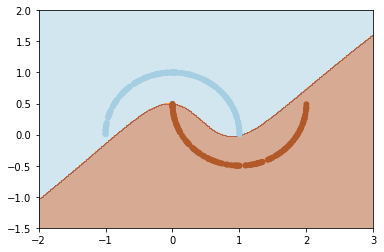

In [161]:
plot_decision_boundary(X_test, y_test, model)